<a href="https://colab.research.google.com/github/jakeh46g/Text-Mining-Clustering-Analysis/blob/main/Text_Mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
import re

In [7]:
# Load text file and resolve formatting issues
with open("/content/drive/MyDrive/Colab Notebooks/data/airlinetweets.csv", "r", encoding="utf-8") as file:
   comments = [re.sub(r'[^a-zA-Z\s]', '', line.strip().lower()) for line in file.readlines() if line.strip()]

In [8]:
# Convert text to binary term-document matrix for top 5 terms
vectorizer = CountVectorizer(stop_words='english', max_features=5, binary=True)
binary_matrix = vectorizer.fit_transform(comments).toarray()
terms = vectorizer.get_feature_names_out()

In [9]:
# Convert matrix to DataFrame for top 5 terms
binary_df = pd.DataFrame(binary_matrix, columns=terms)
print("Binary Term-Document Matrix (Top 5 terms):")
print(binary_df)
# Top 5 terms are agent, bag, flight, gate, rude

Binary Term-Document Matrix (Top 5 terms):
    agent  bag  flight  gate  rude
0       0    0       0     0     1
1       0    1       1     0     0
2       1    0       0     0     0
3       0    0       0     0     0
4       1    0       0     1     1
5       1    0       1     1     1
6       0    0       1     0     1
7       0    1       0     1     0
8       0    1       0     0     0
9       0    0       0     0     0
10      0    0       0     0     0
11      0    1       1     0     0
12      0    1       0     0     0
13      0    0       0     0     0
14      0    0       0     0     0
15      0    0       0     0     1
16      1    0       1     1     0
17      0    0       0     0     0
18      0    0       1     0     0
19      0    0       1     0     0
20      0    0       0     1     0
21      0    0       1     0     1
22      0    1       0     0     0
23      0    0       0     0     0
24      1    0       0     1     0
25      1    0       1     1     0
26      0   

In [10]:
# Compute linkage for hierarchical clustering
linkage_matrix = linkage(binary_matrix, method='ward')

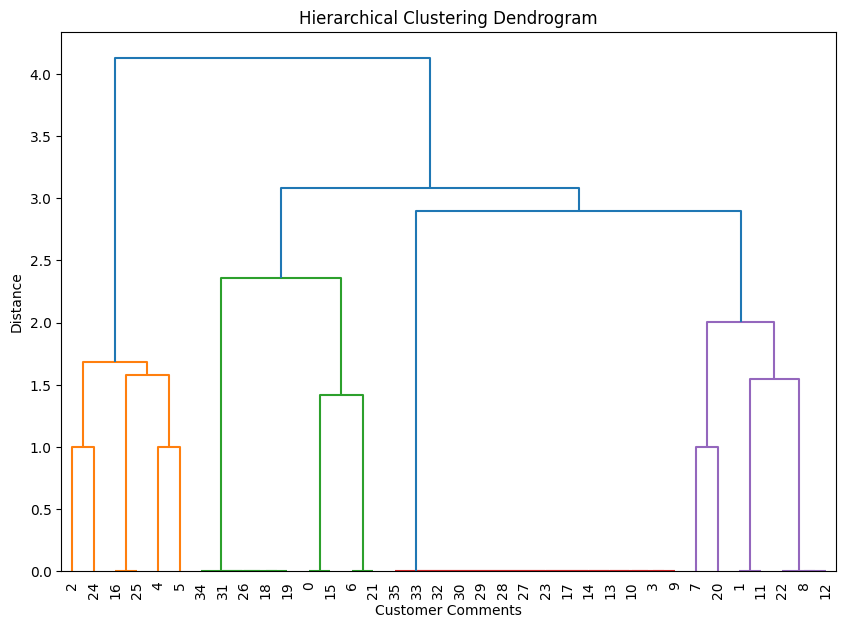

In [11]:
# Plot dendrogram to visualize clustering
plt.figure(figsize=(10, 7))
plt.title('Hierarchical Clustering Dendrogram')
dendrogram(linkage_matrix, labels=np.arange(len(comments)), leaf_rotation=90, leaf_font_size=10)
plt.xlabel("Customer Comments")
plt.ylabel("Distance")
plt.show()

In [12]:
cluster = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward')
labels = cluster.fit_predict(binary_matrix)

In [13]:
results_df = pd.DataFrame({
    'Comment': comments,
    'Cluster': labels
})
print("\nCustomer Comments with Cluster Labels:")
print(results_df.sort_values(by='Cluster'))

# Cluster 0 includes comments about flights
# Cluster 1 includes comment about rude staff inlcuding gate agents
# Cluster 2 inlcudes comments about lost or mishandled bags/luggage
# Cluster 3 includes miscellaneous comments
# Management could use these clusters to direct comments to the approriate team. For example, separating comments between on-flight staff and gate staff



Customer Comments with Cluster Labels:
                                              Comment  Cluster
0   im so upset that my luggage was damaged and th...        0
6   when i corrected the attendants error she gave...        0
15  has grounded  flights bc of equipment problems...        0
31  are people in an exit row still supposed to gi...        0
26  currently as im bringing my  year old to the b...        0
21  almost bumped me off my flight to hrl when i w...        0
18  according to the flight attendant my husband d...        0
19  your staff was really kind about the flight de...        0
34  my bday was yesterday and my girl gave birth t...        0
16  gate agent gave me wrong departure info and ca...        1
25  a very tortured boarding on flight  due to one...        1
24  your gate agent rerouted an impossible itinera...        1
5   had a very rude gate agent at bwi tonight gate...        1
2   agent rudely tells me youre not going  cabo to...        1
4   rude gate a